In [1]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import openpyxl
from openpyxl import load_workbook

In [2]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list


# function to check whether the list is empty or not
def is_list_empty(list):
    # checking the length
    if len(list) == 0:
        # returning true as length is 0
        return True
    # returning false as length is greater than 0
    return False

In [3]:
url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/vacant%20spaces_bigger%20radius.txt"
resp = requests.get(url)
vacant_spaces = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/available%20waste%202.txt"
resp = requests.get(url)
wastes = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/occupied%20nodes.txt"
resp = requests.get(url)
occupied_nodes = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/used%20waste.txt"
resp = requests.get(url)
used_waste_source = json.loads(resp.text)

In [4]:
#retrieve connections between vacant spaces within radius=x
url1="https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges_vacant200.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_space300  = [tuple(i) for i in edges1]

#retrieve connections within radius=x with identifiers
url1="https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges_try2.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_waste300 = [tuple(i) for i in edges1]
# print(waste_nearby100,len(waste_nearby100))

In [5]:
occupied={}
for space in occupied_nodes:
    if occupied_nodes[space]["system"]!=None:
        occupied[space]={}
        occupied[space]["system"]=occupied_nodes[space]["system"]
print(occupied)    

{'V2': {'system': 'UF4'}, 'V3': {'system': 'UF8'}, 'V5': {'system': 'UF2'}, 'V8': {'system': 'UF4'}, 'V22': {'system': 'UF4'}, 'V24': {'system': 'UF4'}, 'V27': {'system': 'UF4'}, 'V40': {'system': 'UF4'}, 'V44': {'system': 'UF4'}, 'V66': {'system': 'UF3'}, 'V72': {'system': 'UF4'}, 'V131': {'system': 'UF4'}, 'V136': {'system': 'UF4'}}


In [6]:
#NOTE : SHOULD REMOVE OCCUPIED VACANT SPACES, AND USED WASTE SOURCES FROM THE DICTIONARIES

nearby_waste200=[]
for index,couple in enumerate(nearby_waste300):
    if couple[0] not in occupied:
        nearby_waste200.append(couple)

nearby_waste100=[]
for index,couple in enumerate(nearby_waste200):
    if couple[1] in wastes:
        nearby_waste100.append(couple)

nearby_space200=[]
for index,couple in enumerate(nearby_space300):
    if couple[0] not in occupied:
        nearby_space200.append(couple)

nearby_space100=[]
for index,couple in enumerate(nearby_space200):
    if couple[1] in vacant_spaces:
        nearby_space100.append(couple)

In [7]:
for count in range(len(nearby_waste100)):
    for couple in nearby_waste100:
        if couple[1] in used_waste_source:
            # print(couple)
            nearby_waste100.remove(couple)

for couple in nearby_waste100:
    if couple[1] in used_waste_source:
        print(couple)

In [8]:
for waste in wastes:
    for couple in nearby_waste100:
        if wastes[waste]["type"]=="None":
            if waste == couple[1]:
                print(couple, "removed")
                nearby_waste100.remove(couple)
                (couple,"removed")
print(nearby_waste100,len(nearby_waste100))

[('V0', 'WO74'), ('V0', 'WO77'), ('V0', 'WO75'), ('V0', 'WO76'), ('V0', 'WO78'), ('V1', 'WO54'), ('V1', 'WO48'), ('V1', 'WO84'), ('V1', 'WO85'), ('V1', 'WO18'), ('V1', 'WO63'), ('V1', 'WO65'), ('V6', 'WO2'), ('V6', 'WO1'), ('V6', 'WO6'), ('V6', 'WO4'), ('V6', 'WO3'), ('V9', 'WO78'), ('V9', 'WO76'), ('V9', 'WO75'), ('V10', 'WO72'), ('V10', 'WO62'), ('V10', 'WO73'), ('V10', 'WO61'), ('V10', 'WO60'), ('V10', 'WO65'), ('V10', 'WO63'), ('V13', 'WO40'), ('V13', 'WO35'), ('V13', 'WO21'), ('V13', 'WO38'), ('V13', 'WO18'), ('V13', 'WO22'), ('V13', 'WO39'), ('V13', 'WO20'), ('V13', 'WO23'), ('V13', 'WO34'), ('V13', 'WO36'), ('V13', 'WO19'), ('V13', 'WO14'), ('V13', 'WO12'), ('V13', 'WO11'), ('V13', 'WO45'), ('V13', 'WO33'), ('V13', 'WO13'), ('V13', 'WO31'), ('V14', 'WO9'), ('V14', 'WO10'), ('V14', 'WO11'), ('V14', 'WO13'), ('V14', 'WO12'), ('V14', 'WO23'), ('V14', 'WO19'), ('V14', 'WO22'), ('V14', 'WO20'), ('V14', 'WO18'), ('V14', 'WO21'), ('V18', 'WO72'), ('V23', 'WO45'), ('V23', 'WO14'), ('V23

In [9]:
workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        if value[4]!=0:
            wastes[value[0]]={}
            wastes[value[0]]["location"]=value[1]
            wastes[value[0]]["source"]=value[2]
            wastes[value[0]]["tag"]=value[5]
            wastes[value[0]]["type"]=value[3]
            wastes[value[0]]["quantity"]=int(value[4])
            wastes[value[0]]["node_type"]="waste"


#assign ranges to quantities
for waste in wastes:
    if wastes[waste]["type"]=="W1":
        if wastes[waste]["quantity"]<= 91852:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>91852) and (wastes[waste]["quantity"]<=459261):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>459261:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W2":
        if wastes[waste]["quantity"]<= 25000:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>25000) and (wastes[waste]["quantity"]<=125000):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>125000:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W3":
        if wastes[waste]["quantity"]<= 5906:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>5906) and (wastes[waste]["quantity"]<=29531):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>29531:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W4":
        if wastes[waste]["quantity"]<= 14100:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>14100) and (wastes[waste]["quantity"]<=70500):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>70500:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W5":
        if wastes[waste]["quantity"]<= 7937:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>7937) and (wastes[waste]["quantity"]<=39684):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>39684:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W6":
        if wastes[waste]["quantity"]<= 187612:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>187612) and (wastes[waste]["quantity"]<=938060):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>938060:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W7":
        if wastes[waste]["quantity"]<= 100000:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>100000) and (wastes[waste]["quantity"]<=500000):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>500000:
            wastes[waste]["size"]=3
# #remove quantity
for waste in wastes:
    wastes[waste].pop("quantity")

In [10]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"SF","weight":3,"solar":2,"in":["W7"],"supplement":["S5"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":None,"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]}
}

critical_items=["W1","W2","W3", "W4"]
non_critical_items=["W5","W6","W7"]

0. Prepare Data For Decision Making

In [11]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
# print(v_potential)

for couple_count in range(len(nearby_waste100)):
    for couple in nearby_waste100:
        if couple[1] in wastes:
            for index,item in enumerate(couple):
                if vacant_spaces[couple[0]]["building"]!=wastes[couple[1]]["source"]:
                    # print(couple,vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
                    if (wastes[couple[1]]["type"]=="W5") or (wastes[couple[1]]["type"]=="W6") or (wastes[couple[1]]["type"]=="W7"):
                        if couple in nearby_waste100:
                            # print(couple,wastes[couple[1]]["type"])
                            # print("removed",couple,wastes[couple[1]]["type"],vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
                            nearby_waste100.remove(couple)
        else:
            print(couple,"not in nearby_waste100")
                

# print(nearby_waste100)  


{'V0': ['WO74', 'WO75', 'WO78'], 'V1': ['WO54', 'WO48', 'WO84', 'WO65'], 'V4': [], 'V6': ['WO2', 'WO1', 'WO4', 'WO3'], 'V7': [], 'V9': ['WO78', 'WO75'], 'V10': ['WO72', 'WO73', 'WO65'], 'V11': [], 'V12': [], 'V13': ['WO40', 'WO34', 'WO36', 'WO14', 'WO12', 'WO11', 'WO33', 'WO31'], 'V14': ['WO9', 'WO10', 'WO11', 'WO12'], 'V15': [], 'V16': [], 'V17': [], 'V18': ['WO72'], 'V19': [], 'V20': [], 'V21': [], 'V23': ['WO14', 'WO34', 'WO36', 'WO40', 'WO31', 'WO33'], 'V25': ['WO11', 'WO10', 'WO9', 'WO12', 'WO54'], 'V26': [], 'V28': ['WO12', 'WO11', 'WO40', 'WO33', 'WO10', 'WO36', 'WO28'], 'V29': ['WO53'], 'V30': ['WO53'], 'V31': [], 'V32': ['WO75', 'WO78'], 'V33': [], 'V34': [], 'V35': ['WO74'], 'V36': [], 'V37': [], 'V38': ['WO53'], 'V39': ['WO53'], 'V41': ['WO78', 'WO75'], 'V42': [], 'V43': ['WO74'], 'V45': [], 'V46': [], 'V47': ['WO74'], 'V48': [], 'V49': ['WO75', 'WO78'], 'V50': ['WO53'], 'V51': ['WO84'], 'V52': ['WO78', 'WO75', 'WO74'], 'V53': ['WO54', 'WO65', 'WO72', 'WO48'], 'V54': ['WO14'

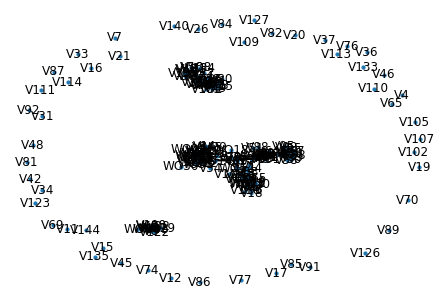

In [12]:
# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i,j in vacant_spaces.items():
    G.add_node(i)
G.add_edges_from(nearby_waste100)
nx.draw(G, with_labels=True, node_size=10)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    if i in vacant_spaces:
        waste_dict[i]=k
        
#List of dictionaries we will use:
# print(v_potential)
print(waste_dict)
# print(uf_systems)

# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}
for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]
        
#Design Rule 1.0 : Waste Availability
    #if there are more than 2 found items assign that system to that vacant space
    

Design Rule 3.0 : Sharing Existing Resources
    

Prepare Data

In [13]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    for system,demanded in k.items():
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found_dict[i][system]["source"]={}
        found=[]
        source=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                if waste in wastes:
                    available = wastes[waste]["type"]
                    source2 = wastes[waste]["tag"]
                    print(i,wastes[waste])
                    source_size = wastes[waste]["size"]
                    if each == available:
                        found.append(available)
                        source.append(source2)
                        found_dict[i][system]["found"]=found
                        found_dict[i][system]["source"]=source


V0 {'location': '{2065.234004, 423.253128, 0}', 'source': 'AS2', 'tag': 'WO74', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{2065.234004, 423.253128, 0}', 'source': 'AS2', 'tag': 'WO74', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{2065.234004, 423.253128, 0}', 'source': 'AS2', 'tag': 'WO74', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 341.032952, 0}', 'source': 'fellowship', 'tag': 'WO75', 'type': 'W1', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 341.032952, 0}', 'source': 'fellowship', 'tag': 'WO75', 'type': 'W1', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 341.032952, 0}', 'source': 'fellowship', 'tag': 'WO75', 'type': 'W1', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 286.499162, 0}', 'source': 'AE', 'tag': 'WO78', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 286.499162, 0}', 'source': 'AE', 'tag': 'WO78', 'type': 'W4'

In [14]:
#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

#reach sizes of duplicate items
for i,k in found_dict.items():
    for system in k:
        found_items=found_dict[i][system]["found"]


In [15]:
#add a new list to the found dict -> for 1 waste source matching the size of space
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["enough waste"]=[]
        found_dict[space][system]["enough source"]=[]
        for item in found_dict[space][system]["source"]:
            if wastes[item]["size"]==vacant_spaces[space]["size"]:
                if found_dict[space][system]["enough waste"]==[]:
                    print(space,system,item,wastes[item]["type"],"1")
                    found_dict[space][system]["enough waste"].append(wastes[item]["type"])
                    found_dict[space][system]["enough source"].append(wastes[item]["tag"])
                    found_dict[space][system]["found"].remove(wastes[item]["type"])
                    found_dict[space][system]["source"].remove(wastes[item]["tag"])
                    break
                elif found_dict[space][system]["enough waste"]!=[]:
                    for waste in found_dict[space][system]["enough waste"]:
                        if wastes[waste]["type"]!=wastes[item]["type"]:
                            print(space,system,item,wastes[item]["type"],"2")
                            found_dict[space][system]["enough waste"].append(wastes[item]["type"])
                            found_dict[space][system]["enough source"].append(wastes[item]["tag"])
                            found_dict[space][system]["found"].remove(wastes[item]["type"])
                            found_dict[space][system]["source"].remove(wastes[item]["tag"])

# print(found_dict)

V23 UF3 WO14 W3 1
V29 UF3 WO53 W3 1
V50 UF3 WO53 W3 1


In [16]:

#Make a dictionary holding each vacant space& found and repeating waste type & waste sources corresponding to found items
duplicate_items={}
for space,potential in found_dict.items():
    duplicate_items[space]={}
    for system, k in potential.items():
        if len(found_dict[space][system]["found"])> 1:
            found_items3=found_dict[space][system]["found"]
            sources=[]
            for index,items in enumerate(found_items3):
                duplicate_items[space][items]={}
                count=found_items3.count(items)
                if count>1:
                    items_str=str(items)
                    sources.append(found_dict[space][system]["source"][index])
                    duplicate_items[space][items]["matching sources"]=sources


In [17]:
# check if the total size of found waste matches the vacant space size
satisfying_duplicate={}
not_enough_waste={}
for space, k in duplicate_items.items():
    print(space)
    satisfying_duplicate[space]={}
    not_enough_waste[space]={}
    for key,value in k.items():
        print(key)
        satisfying_duplicate[space][key]={}
        not_enough_waste[space][key]={}
        waste_matched=[]
        not_matched=[]
        if duplicate_items[space][key]!=[]:
            for m,n in duplicate_items[space][key].items():
                matched=duplicate_items[space][key][m]
                found_new=[]
                for items in matched:
                    found_new.append(items)
                    waste_matched.append(wastes[items]["size"])
                    if sum(waste_matched)==vacant_spaces[space]["size"]:
                        print(space,vacant_spaces[space]["size"], waste_matched, "add to found list and remove from missing")
                        print(found_new, "is found")
                        print(waste_matched)
                        satisfying_duplicate[space][key]=found_new
                        break
                    else:
                        # print(sum(waste_matched),"And",vacant_spaces[space]["size"],items)
                        not_matched.append(items)
                        print(not_matched,"is not matched")
                        not_enough_waste[space][key]=not_matched
                    
                    
print(satisfying_duplicate)

V0
V1
V4
V6
V9
V10
V11
V12
V14
V15
V16
V17
V18
V19
V21
V23
W3
W4
['WO40'] is not matched
V23 3 [2, 1] add to found list and remove from missing
['WO40', 'WO31'] is found
[2, 1]
V25
V26
V28
V29
V30
V31
V32
V33
V35
V36
V37
V38
V39
V41
V42
V43
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V67
V68
V69
V71
V73
V74
V75
V76
V78
V79
V80
V81
V82
V84
V85
V86
V87
V88
V89
V91
V92
V94
V97
V100
V102
V103
V106
V107
V108
V109
V110
V112
W4
W3
['WO34'] is not matched
['WO34', 'WO14'] is not matched
V113
V115
V116
V117
V118
V120
V121
V122
V124
V125
V126
V127
V128
V129
V130
V132
V133
V134
V135
V137
V138
V139
V140
V141
V142
V144
V145
{'V0': {}, 'V1': {}, 'V4': {}, 'V6': {}, 'V9': {}, 'V10': {}, 'V11': {}, 'V12': {}, 'V14': {}, 'V15': {}, 'V16': {}, 'V17': {}, 'V18': {}, 'V19': {}, 'V21': {}, 'V23': {'W3': {}, 'W4': ['WO40', 'WO31']}, 'V25': {}, 'V26': {}, 'V28': {}, 'V29': {}, 'V30': {}, 'V31': {}, 'V32': {}, 'V33': {}, 'V35': {}, 'V36': {}, 'V37': {}, 'V38': {}, 'V39': {}

In [18]:
#remove duplicate items if they are also in satisfying_duplicate items list
for space,potential in found_dict.items():
    for system in potential.keys():
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                        if len(found_dict[space][system]["found"])>0:
                            print("there are found items")
                            if len(satisfying_duplicate[key][waste])>0:
                                print("there are satisfying duplicate items")
                                if waste in found_dict[space][system]["found"]:
                                    print(waste,"is in found dict",space,system)
                                    found_items = found_dict[space][system]["found"]
                                    found_dict[space][system]["enough waste"].append(waste)
                                    for item in satisfying_duplicate[key][waste]:
                                        found_dict[space][system]["enough source"].append(item)
                                        found_dict[space][system]["source"].remove(item)
                                    for found_range in range(len(found_items)):
                                        for found in found_items:
                                            print(found_items,space,system)
                                            counter=found_items.count(found)
                                            print(waste,counter,space,system)
                                            if counter>1:
                                                print(found,"REMOVED",space,system)  
                                                found_items.remove(found)


there are found items
there are found items
there are satisfying duplicate items
W4 is in found dict V23 UF3
['W3', 'W4', 'W4', 'W4'] V23 UF3
W4 1 V23 UF3
['W3', 'W4', 'W4', 'W4'] V23 UF3
W4 3 V23 UF3
W4 REMOVED V23 UF3
['W3', 'W4', 'W4'] V23 UF3
W4 2 V23 UF3
W4 REMOVED V23 UF3
['W3', 'W4'] V23 UF3
W4 1 V23 UF3
['W3', 'W4'] V23 UF3
W4 1 V23 UF3
['W3', 'W4'] V23 UF3
W4 1 V23 UF3
['W3', 'W4'] V23 UF3
W4 1 V23 UF3
['W3', 'W4'] V23 UF3
W4 1 V23 UF3
['W3', 'W4'] V23 UF3
W4 1 V23 UF3
there are found items
there are found items


In [19]:
#remove duplicate items if they are not in satisfying_duplicate items list
for space in found_dict.keys():
    for system in found_dict[space].keys():
        found_items = found_dict[space][system]["found"]
        missing_items = found_dict[space][system]["missing"]
        duplicate=list_duplicates(found_items)
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                    for found in found_items:
                        if found in duplicate:
                            print("duplicate",space,found,system)
                            if satisfying_duplicate[space][found]==[]:
                                print("duplicate not satisfying",space,found,system)
                                found_items.remove(found) 
                                if found not in missing_items:
                                    missing_items.append(found)
                                if (found in missing_items) and (found in found_items):
                                    found_items.remove(found)            
                                

duplicate V112 W3 UF3
duplicate V112 W3 UF3
duplicate V112 W3 UF3
duplicate V112 W3 UF3


In [20]:
for space in found_dict:
    for system in found_dict[space]:
        source=found_dict[space][system]["source"]
        for index,item in enumerate(source):
            waste=wastes[item]["type"]
            if waste in found_dict[space][system]["found"]:
                print("found",space,item,waste)
            else:
                source.remove(item)
                print(item,"removed from",space,system,waste)
 

found V23 WO34 W3
found V23 WO33 W4
found V41 WO78 W4
found V55 WO53 W3
found V56 WO74 W4
found V68 WO6 W5
found V68 WO6 W5
found V68 WO6 W5
found V79 WO18 W5
found V79 WO18 W5
found V79 WO18 W5
found V112 WO31 W4
found V112 WO34 W3
found V112 WO14 W3


In [21]:
#add circularity percentage to found_dict
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["circularity"]=[]
        found=len(found_dict[space][system]["enough waste"])
        missing=len(found_dict[space][system]["missing"])
        total=found+missing
        found_dict[space][system]["circularity"]=found/total
# print(found_dict)   

#make a duplicate of found dict, sort system based on circularities
sorted_dict={}
for space in found_dict:
    system=sorted(found_dict[space], key=lambda x: (found_dict[space][x]['circularity']), reverse=True)  
    sorted_dict[space]={} 
    for item in system:
        values={}
        values=(found_dict[space][item])
        sorted_dict[space][item]=values

# print(sorted_dict)

Assign Food Production System To Vacant Space

In [22]:
#check if the criteria is satisfied
occupied={}
used_waste=[]
used_waste_source_temp=[]
new_edges=[]
occupied_dict={}

for space in sorted_dict:
    print("looking for", space)
    print("for",space,sorted_dict[space],"is possible")
    occupied_dict[space]={}
    occupied_dict[space]["system"]={}
    occupied_dict[space]["found"]={}
    occupied_dict[space]["source"]={}
    occupied_dict[space]["missing"]={}
    for index,system in enumerate(sorted_dict[space]):
        print("looking for system", system)
        occupied[space]={}
        occupied[space]["system"]={}
        found_list=sorted_dict[space][system]["enough waste"]
        sources_list=sorted_dict[space][system]["enough source"]
        missing_list=sorted_dict[space][system]["missing"]
        print(len(missing_list),"is length for",space,system)

        if len(occupied[space]["system"])==0:
            print(space,"is not occupied run for",system)
            if len(missing_list)==0:    
                for source in sources_list:
                    if source in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        pass
                    elif source not in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        occupied[space]["system"]=system
                        occupied_dict[space]["system"]=system
                        occupied_dict[space]["found"]=sorted_dict[space][system]["enough waste"]
                        occupied_dict[space]["source"]=sorted_dict[space][system]["enough source"]
                        for items in found_list:
                            used_waste.append(items)
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
                        print("no missing items:", space, system, "assign")
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break
            elif len(missing_list)==1:
                print("one item",system,space)
                for missing in missing_list:
                    if missing in non_critical_items:
                        print("one non critical item",missing,system,space)
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["enough waste"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["enough source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                                print("one non critical missing items:", space, system, "assign")
                            else:
                                print(source,"already used")
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break 
            elif len(missing_list)==2:
                print("two items",system,space)
                for missing in missing_list:
                    print("two items",missing)
                    if missing in non_critical_items:
                        print("two items",missing,"not critical")
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["enough waste"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["enough source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                print("two non critical missing items:", space, system,"assign")
                                print(space,occupied_dict[space])
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break  
for space in occupied_dict:
    if len(occupied_dict[space]["system"])!=0:
        print(space,occupied_dict[space]["system"])

looking for V0
for V0 {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'enough waste': [], 'enough source': [], 'circularity': 0.0}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'enough waste': [], 'enough source': [], 'circularity': 0.0}, 'UF6': {'found': {}, 'source': {}, 'missing': ['W6'], 'enough waste': [], 'enough source': [], 'circularity': 0.0}, 'UF7': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'enough waste': [], 'enough source': [], 'circularity': 0.0}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'enough waste': [], 'enough source': [], 'circularity': 0.0}} is possible
looking for system UF4
3 is length for V0 UF4
V0 is not occupied run for UF4
looking for system UF5
3 is length for V0 UF5
V0 is not occupied run for UF5
looking for system UF6
1 is length for V0 UF6
V0 is not occupied run for UF6
one item UF6 V0
one non critical item W6 UF6 V0
looking for system UF7
3 is length for V0 UF7
V0 is not oc

Create New List To Be Used In Next Steps

In [23]:
# print(occupied)  
# print(used_waste_source) 
# print(new_edges)
# print(occupied_dict)
#add circularity & outputs to occupied_dict
for space in occupied_dict:
    occupied_dict[space]["circularity"]={}
    occupied_dict[space]["outputs"]={}
    occupied_dict[space]["supplements"]={}
    if len(occupied_dict[space]["system"])!=0:
        system=occupied_dict[space]["system"]
        outputs=(uf_systems[system]["out"])
        supplements=uf_systems[system]["supplement"]
        occupied_dict[space]["circularity"]=found_dict[space][system]["circularity"]
        occupied_dict[space]["supplements"]=supplements
        occupied_dict[space]["outputs"]=outputs

#remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)
# print("occupied",occupied_dict)

#remove assigned spaces from found_dict
remove2=[]
for space in sorted_dict:
    if space in occupied_dict:
        remove2.append(space)
for items in remove2:
    sorted_dict.pop(items)
# print("non occupied",sorted_dict)

6. Assign Food Producing Supplementary Systems

Prepare Data

In [24]:
#look for a system that can supply needed supplement
#put the findings in a dictionary
v_supplement_fs={}
for space in occupied_dict:
    v_supplement_fs[space]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["fs_system"]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["supplement source"]={}
    v_supplement_fs[space]["fs_demand"]={}
    v_supplement_fs[space]["fs_demand source"]={}
    v_supplement_fs[space]["potential source"]={}
    supplement=occupied_dict[space]["supplements"]
    if supplement!=None:
        for item in supplement:
            if item=="S2": 
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    if "S2" in out:
                        print("maybe",space, i,uf_systems[i]["in"])
                        v_supplement_fs[space]["fs_system"]=i
                        v_supplement_fs[space]["supplement"]=item
                        v_supplement_fs[space]["fs_demand"]=uf_systems[i]["in"]
    else:
        v_supplement_fs[space]["fs_system"]={}

print(v_supplement_fs)


{'V23': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}}


In [25]:
#created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type
#for each space found what kind of system and supplement and input is necessary 

#look neighbors of supplement needing space to see if there is a potential neighbor
for space in v_supplement_fs:
    potential=[]
    for space2,neighbor in nearby_space100:
        if space==space2:
            if v_supplement_fs[space]["fs_system"]!={}:
                if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                    # print(neighbor,"is available")
                    system=v_supplement_fs[space]["fs_system"]
                    print(system,"system")
                    print(vacant_spaces[space]["size"],vacant_spaces[neighbor]["size"])
                    if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                        potential.append(neighbor)
                        # print(space,potential)
                        v_supplement_fs[space]["potential source"]=potential
        elif space==neighbor:
                print(neighbor,space2,"reverse is available")
                if v_supplement_fs[space]["fs_system"]!=None:
                    if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                        print(space2,"is available")
                        system=v_supplement_fs[space]["fs_system"]
                        if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                            potential.append(space2)
                            print(potential)
                            print(space,potential)
                            print(space,"matches",space2,"and",system)
                            v_supplement_fs[space]["potential source"]=potential
                        else:
                            print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                            print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                    else:
                        print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
print(v_supplement_fs)


V23 V130 reverse is available
V23 V130 not available {} no need for supplement
{'V23': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}}


In [26]:
#check if potential sources have fs_demand
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        # print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            print(nearby_list)
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        if v_supplement_fs[space]["fs_demand"]==wastes[nearby]["type"]:
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]=nearby
                            print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break
                        elif v_supplement_fs[space]["fs_demand"]!=wastes[nearby]["type"]:
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]="supply externally"
                            print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
# print(v_supplement_fs)  
# print(used_waste_source) 
# print(new_edges)     
print("occupied",occupied_dict)


for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        if (len(v_supplement_fs[space]["supplement source"])!=0) and (v_supplement_fs[space]["fs_demand source"]!="supply externally"):
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
        elif v_supplement_fs[space]["fs_demand source"]=="supply externally":
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=None
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
print(occupied_dict)


#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]
    
print(network_dict)
print(occupied_dict)
for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        print("work")
        if len(v_supplement_fs[space]["supplement source"])!=0:
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            print(occupied_dict)
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
print(occupied_dict)

#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]

print(network_dict)

#now we have food supplying supplementary systems
#we still need to check if these systems need supplements
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    # print(system)
    # print(uf_systems[system]["supplement"])
    value=uf_systems[system]["supplement"]
    if value!=None:
        for supplement in value:
            if (supplement=="S5") or (supplement=="S4"):
                v_supplement_fs[space]={}
                v_supplement_fs[space]["supplement"]=supplement
                for uf in uf_systems:
                    for out in uf_systems[uf]["out"]:
                        if supplement == out:
                            v_supplement_fs[space]["fs_system"]=uf
                            v_supplement_fs[space]["fs_demand"]=uf_systems[uf]["in"]
                v_supplement_fs[space]["supplement source"]={}
                v_supplement_fs[space]["fs_demand source"]={}
                v_supplement_fs[space]["potential source"]={}
print(v_supplement_fs)


occupied {'V23': {'system': 'UF3', 'found': ['W3', 'W4'], 'source': ['WO14', 'WO40', 'WO31'], 'missing': ['W2', 'W6'], 'circularity': 0.5, 'outputs': ['O3', 'S4'], 'supplements': None}}
{'V23': {'system': 'UF3', 'found': ['W3', 'W4'], 'source': ['WO14', 'WO40', 'WO31'], 'missing': ['W2', 'W6'], 'circularity': 0.5, 'outputs': ['O3', 'S4'], 'supplements': None}}
{'WO14': {'type': 'W3', 'size': 3, 'receiver': 'V23'}, 'WO40': {'type': 'W4', 'size': 2, 'receiver': 'V23'}, 'WO31': {'type': 'W4', 'size': 1, 'receiver': 'V23'}}
{'V23': {'system': 'UF3', 'found': ['W3', 'W4'], 'source': ['WO14', 'WO40', 'WO31'], 'missing': ['W2', 'W6'], 'circularity': 0.5, 'outputs': ['O3', 'S4'], 'supplements': None}}
{'V23': {'system': 'UF3', 'found': ['W3', 'W4'], 'source': ['WO14', 'WO40', 'WO31'], 'missing': ['W2', 'W6'], 'circularity': 0.5, 'outputs': ['O3', 'S4'], 'supplements': None}}
{'WO14': {'type': 'W3', 'size': 3, 'receiver': 'V23'}, 'WO40': {'type': 'W4', 'size': 2, 'receiver': 'V23'}, 'WO31': {'t

In [27]:
#make a potential list
for space in v_supplement_fs:
    potential=[]
    print(space)
    if space in vacant_spaces:
        if neighbor in vacant_spaces:
            for space2,neighbor in nearby_space100:  
                if (space==space2):
                    print(space2,neighbor)
                    if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                        print(neighbor,"is available")
                        system=v_supplement_fs[space]["fs_system"]
                        if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                            potential.append(neighbor)
                            print(potential)
                            print(space,potential)
                            v_supplement_fs[space]["potential source"]=potential
                        else:
                            print(space,vacant_spaces[neighbor]["structure"],system,uf_systems[system]["weight"])
                    else:
                        print(space,neighbor,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
                elif space==neighbor:
                    print(neighbor,space2,"reverse is available")
                    if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                        print(space2,"is available")
                        system=v_supplement_fs[space]["fs_system"]
                        if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                            potential.append(space2)
                            print(potential)
                            print(space,potential)
                            print(space,"matches",space2,"and",system)
                            v_supplement_fs[space]["potential source"]=potential
                        else:
                            print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                            print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                            print("size",vacant_spaces[space]["size"]==vacant_spaces[space2]["size"])
                    else:
                        print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
print(v_supplement_fs)


V23
V23 V130
V23 V130 not available {} no need for supplement
V23 V130 reverse is available
V23 V130 not available {} no need for supplement
{'V23': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}}


In [28]:
#check if potential sources have fs_demand
print(used_waste_source)
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        for vacant in potential:
            found=[]
            found_source=[]
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        found.append(wastes[nearby]["type"])
                        found_source.append(nearby)
                        print(found)
                        if v_supplement_fs[space]["fs_demand"]==found:
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]=found_source
                            print(v_supplement_fs[space]["fs_demand source"])
                            for x in found_source:
                                used_waste_source.append(x)
                                edge_tuple1=(x,vacant)
                                new_edges.append(edge_tuple1)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple2)
                            print("new edges added",new_edges)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
print(v_supplement_fs) 
# print(new_edges)
# print(used_waste_source)

['WO37', 'WO41', 'WO43', 'WO44', 'WO42', 'WO7', 'WO5', 'WO8', 'WO26', 'WO24', 'WO27', 'WO67', 'WO58', 'WO55', 'WO64', 'WO59', 'WO51', 'WO50', 'WO52', 'WO0', 'WO82', 'WO57', 'WO56', 'WO79', 'WO81', 'WO80', 'WO68', 'WO49', 'WO66', 'WO14', 'WO40', 'WO31']
{'V23': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}}


In [29]:
print(occupied_dict)
for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        if len(v_supplement_fs[space]["supplement source"])!=0:
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=v_supplement_fs[space]["fs_system"]
            print(occ,system)
            print(len(uf_systems[system]))
            print(len(occupied_dict[occ]["found"]))
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["circularity"]=1.0
print(occupied_dict)



{'V23': {'system': 'UF3', 'found': ['W3', 'W4'], 'source': ['WO14', 'WO40', 'WO31'], 'missing': ['W2', 'W6'], 'circularity': 0.5, 'outputs': ['O3', 'S4'], 'supplements': None}}
{'V23': {'system': 'UF3', 'found': ['W3', 'W4'], 'source': ['WO14', 'WO40', 'WO31'], 'missing': ['W2', 'W6'], 'circularity': 0.5, 'outputs': ['O3', 'S4'], 'supplements': None}}


In [30]:
#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["outputs"]
    
# print(network_dict)

for space in occupied_dict:
    if occupied_dict[space]["system"]==None:
        occupied_dict.remove(space)
print(new_edges)
print(network_dict)

[('WO14', 'V23'), ('WO40', 'V23'), ('WO31', 'V23')]
{'WO14': {'type': 'W3', 'size': 3, 'receiver': 'V23'}, 'WO40': {'type': 'W4', 'size': 2, 'receiver': 'V23'}, 'WO31': {'type': 'W4', 'size': 1, 'receiver': 'V23'}}


In [31]:
vacant_spaces2=vacant_spaces.copy()

for space in occupied_dict:
    vacant_spaces2.pop(space)

file = "vacant spaces_bigger radius2.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(vacant_spaces2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")


wastes2={}

for waste in wastes:
    if waste not in used_waste_source:
        wastes2[waste]={}
        wastes2[waste]["location"]=wastes[waste]["location"]
        wastes2[waste]["source"]=wastes[waste]["source"]
        wastes2[waste]["tag"]=wastes[waste]["tag"]
        wastes2[waste]["type"]=wastes[waste]["type"]
        wastes2[waste]["size"]=wastes[waste]["size"]
        wastes2[waste]["node_type"]=wastes[waste]["node_type"]

file = "available waste 3.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(wastes2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "used waste2.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(used_waste_source, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

vacant spaces_bigger radius2.txt has been updated successfully
available waste 3.txt has been updated successfully
used waste2.txt has been updated successfully


In [32]:
#combine wastes and vacant_spaces
workbook = load_workbook(filename="coordintes_xyz.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

new_edges2=[]
for space in network_dict:
    sources=(network_dict[space]["receiver"])
    tuples=(space,sources)
    new_edges2.append(tuples)
print(new_edges2)

[('WO14', 'V23'), ('WO40', 'V23'), ('WO31', 'V23')]


In [33]:
#update locations in dictionary based on excel worksheet
coordinate_list1=[]
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list1.append(coordinate)


In [34]:
# #create dictionary based on excel worksheet
workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
vacant_spaces1={}
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        vacant_spaces1[value[0]]={}
        vacant_spaces1[value[0]]["location"]=value[1]
        vacant_spaces1[value[0]]["tag"]=value[6]
# print(vacant_spaces1)

In [35]:

for index1,space in enumerate(vacant_spaces1):
    for index2,coordinate in enumerate(coordinate_list1):
        if index1==index2:
            vacant_spaces1[space]["location"]=coordinate_list1[index2]


#update locations in dictionary based on excel worksheet

workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes2={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        wastes2[value[0]]={}
        wastes2[value[0]]["location"]=value[1]
        wastes2[value[0]]["source"]=value[2]
        wastes2[value[0]]["type"]=value[3]
        wastes2[value[0]]["quantity"]=value[4]
        wastes2[value[0]]["tag"]=value[5]
        wastes2[value[0]]["node_type"]="waste"


In [36]:
#update locations in dictionary based on excel worksheet

#update locations in dictionary based on excel worksheet

workbook = load_workbook(filename="coordintes_xyz.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

coordinate_list2=[]
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list2.append(coordinate)

for index1,space in enumerate(wastes2):
    for index2,coordinate in enumerate(coordinate_list2): 
        if index1==index2:
            # print(index2,coordinate,space)
            wastes2[space]["location"]=coordinate_list2[index2]

combined_dict=vacant_spaces1.copy()
combined_dict.update(wastes2)

coordinates=[]
#make a coordinate list for new_edges [(coordinates1,coordinates2),(coordinates1,coordinates2),(coordinates1,coordinates2)]
for item in new_edges2:
        # print(item)
        coordinate_tuple=(combined_dict[item[0]]["location"],combined_dict[item[1]]["location"])
        print(item,coordinate_tuple)
        coordinates.append(coordinate_tuple)

print(coordinates,"is coordinates")
print(new_edges2)



('WO14', 'V23') ((808.020403, 359.910033, 0), (759.513592, 338.631234, 0))
('WO40', 'V23') ((728.736663, 453.456457, 0), (759.513592, 338.631234, 0))
('WO31', 'V23') ((649.033432, 294.049995, 0), (759.513592, 338.631234, 0))
[((808.020403, 359.910033, 0), (759.513592, 338.631234, 0)), ((728.736663, 453.456457, 0), (759.513592, 338.631234, 0)), ((649.033432, 294.049995, 0), (759.513592, 338.631234, 0))] is coordinates
[('WO14', 'V23'), ('WO40', 'V23'), ('WO31', 'V23')]


In [37]:
export_edges_dict={}
for index,couple in enumerate(coordinates):
        export_edges_dict[index]={}
        export_edges_dict[index]["coordinate"]=couple

export_edges_dict={}
for index,waste in enumerate(network_dict):
        export_edges_dict[index]={}
        export_edges_dict[index]["type"]=network_dict[waste]["type"]
        export_edges_dict[index]["connection"]=coordinates[index]

print(export_edges_dict)

{0: {'type': 'W3', 'connection': ((808.020403, 359.910033, 0), (759.513592, 338.631234, 0))}, 1: {'type': 'W4', 'connection': ((728.736663, 453.456457, 0), (759.513592, 338.631234, 0))}, 2: {'type': 'W4', 'connection': ((649.033432, 294.049995, 0), (759.513592, 338.631234, 0))}}


In [38]:
#Make a dictionary o
# f all spaces and systems
export_dict={}
for space in vacant_spaces:
    export_dict[space]={}
    export_dict[space]["location"]={}
    export_dict[space]["system"]={}
for space in vacant_spaces:
    if space in occupied_dict:
        export_dict[space]["system"]=occupied_dict[space]["system"]
        export_dict[space]["location"]=combined_dict[space]["location"]
    else:
        export_dict[space]["system"]=None
        export_dict[space]["location"]=None
print(export_dict)

{'V0': {'location': None, 'system': None}, 'V1': {'location': None, 'system': None}, 'V4': {'location': None, 'system': None}, 'V6': {'location': None, 'system': None}, 'V7': {'location': None, 'system': None}, 'V9': {'location': None, 'system': None}, 'V10': {'location': None, 'system': None}, 'V11': {'location': None, 'system': None}, 'V12': {'location': None, 'system': None}, 'V13': {'location': None, 'system': None}, 'V14': {'location': None, 'system': None}, 'V15': {'location': None, 'system': None}, 'V16': {'location': None, 'system': None}, 'V17': {'location': None, 'system': None}, 'V18': {'location': None, 'system': None}, 'V19': {'location': None, 'system': None}, 'V20': {'location': None, 'system': None}, 'V21': {'location': None, 'system': None}, 'V23': {'location': (759.513592, 338.631234, 0), 'system': 'UF3'}, 'V25': {'location': None, 'system': None}, 'V26': {'location': None, 'system': None}, 'V28': {'location': None, 'system': None}, 'V29': {'location': None, 'system':

In [39]:
file = "occupied nodes2.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges2.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(new_edges, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges_dict2.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_edges_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")        

file = "coordinates2.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(coordinates, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

occupied nodes2.txt has been updated successfully
new_edges2.txt has been updated successfully
new_edges_dict2.txt has been updated successfully
coordinates2.txt has been updated successfully


8. INCREASING RADIUS